In [ ]:
import pandas as pd                   # importing pandas for working with dataframes
import seaborn as sns                 # for making beautiful vizualizations
import matplotlib.pyplot as plt       # importing matplotlib for making scatter plots 
import numpy as np                    # importing Numpy for mathematical operations using arrays
import time                           # importing Time library for time-related functions, here used to convert the date format while synchronizing dates
import statsmodels.api as sm          # importing Statsmodels library for statistical modeling

!pip install --upgrade statsmodels    # upgrade the Statsmodels library using pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
weather = pd.read_csv('Paris_weather_data_2017.csv', encoding = 'unicode_escape')
weather = weather.drop(['Events','high Gust Wind (km/h)'], axis=1)
print(weather)

# Here we have read the data file as pandas dataframe, encoding = 'unicode_escape' handles the special characters in the data file. 
# After that we have dropped the columns which had non numerical values as these could not have been interpolated 

           Date  high Temp. (°C)  avg Temp. (°C)  low Temp. (°C)  \
0      1/1/2017                0              -3              -5   
1      1/2/2017                2               0              -2   
2      1/3/2017                1               0              -1   
3      1/4/2017                6               2              -1   
4      1/5/2017                7               3               1   
..          ...              ...             ...             ...   
360  12/27/2017                6               4               3   
361  12/28/2017                6               2              -1   
362  12/29/2017                8               3              -1   
363  12/30/2017               14              10               6   
364  12/31/2017               15              12               9   

     high Dew Point (°C)  avg Dew Point (°C)  low Dew Point (°C)  \
0                     -1                  -3                  -6   
1                      1                   1   

In [ ]:
weather.isnull().sum().sum()

# Here i have chaecked how many NAN values are there in my data. 

6

In [ ]:
weather.interpolate(method ='linear', inplace = True)

# Here we have used the linear interpolation for cleaning the data and filling the NAN values. Inplace = True replaces the original weather data frame without making a new one


In [ ]:
weather.isnull().sum().sum()

# Here i have chaecked how many NAN values are there in my data and found that all the NAN values have been filled by the method of interpolation 

0

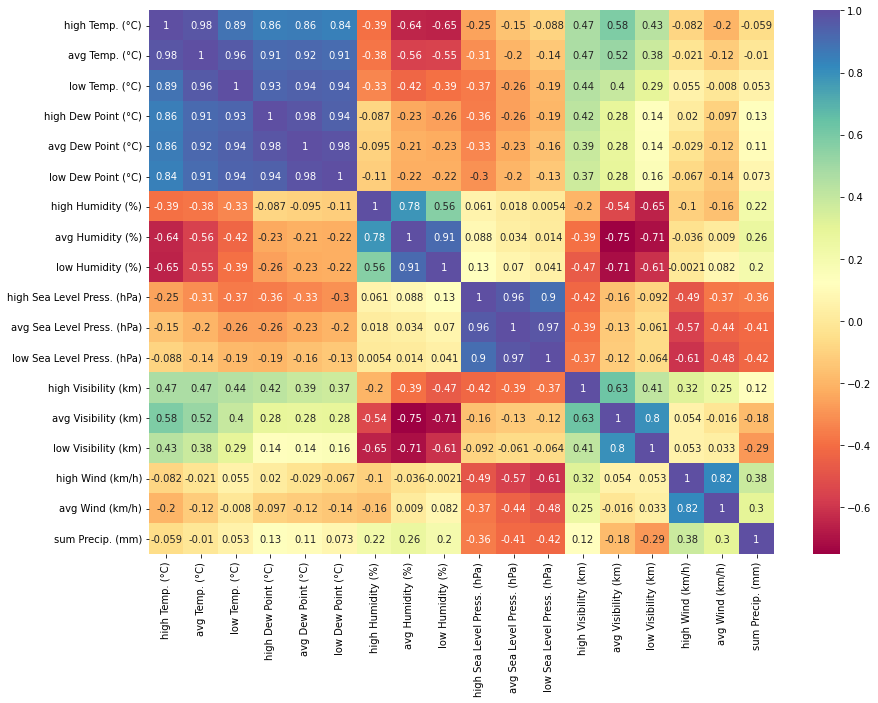

In [ ]:
corr = weather.corr()          # here we have created a correlation matrix of the weather variables. These are the correlation coefficients between pairs of variables in weather dataframe
plt.figure(figsize=(14,10))    # here we have set the figure size
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Spectral', annot = True)   # here we have used the seaborn library for making the heatmap of the correlation matrix, annot = true dispays the correlation values inside the heat maps
plt.show()

In [ ]:
df1 = pd.read_csv('Historique_consommation_JOUR_2017.csv')
print(df1)

# here we are reading the energy data as a dataframe named df1 

                                            Unnamed: 0  Unnamed: 1  \
0                                                  NaN         NaN   
1                                                  NaN         NaN   
2    Les données accessibles ci-dessous reflètent l...         NaN   
3    Ces données sont calculées à partir de données...         NaN   
4                                                  NaN         NaN   
..                                                 ...         ...   
379                                                NaN         NaN   
380                                                NaN         NaN   
381                                                NaN         NaN   
382                                                NaN         NaN   
383                                                NaN         NaN   

     HISTORIQUE DES CONSOMMATIONS JOURNALIERES EN ENERGIE (MWh)  Unnamed: 3  \
0                                                  NaN                  NaN   
1

In [ ]:
df_1 = df1.drop(labels = range(0,6), axis = 0, inplace = False)
df_11 = df_1.drop(columns=df_1.columns[0:3], inplace = False)
energy_cons = df_11.drop(labels =7 , inplace = False)

# here we have cleaned the data using drop() method and have dropped the empty rows and columns 

energy_cons.columns = energy_cons.iloc[0]            
# here we have set the column names of our dataframe with the values from the first row of our DataFrame

energy_cons = energy_cons[1:]
# here we have removed the first row from our data

energy_cons['Energie journalière (MWh)'] = pd.to_numeric(energy_cons['Energie journalière (MWh)'], errors='coerce')
# here we have converted the data type in the 'Energie journalière (MWh)' column to numerical values, errors='coerce' converts the non numeric values to NAN

print(energy_cons)

6          Date Type de données  Energie journalière (MWh)
8      1/1/2017     Définitives                  1652084.0
9      2/1/2017     Définitives                  1768332.0
10     3/1/2017     Définitives                  1886120.0
11     4/1/2017     Définitives                  1923775.0
12     5/1/2017     Définitives                  1887470.0
..          ...             ...                        ...
379  27/12/2017     Définitives                  1582970.0
380  28/12/2017     Définitives                  1664743.0
381  29/12/2017     Définitives                  1668623.0
382  30/12/2017     Définitives                  1437082.0
383  31/12/2017     Définitives                  1335348.0

[376 rows x 3 columns]


In [ ]:
weather['Date'] = pd.to_datetime(weather['Date'], format='%m/%d/%Y')
energy_cons['Date'] = pd.to_datetime(energy_cons['Date'], format='%d/%m/%Y')

# here we have used the pd.to_datetime() function to convert strings in the date column of our dataframes to datetime objects.
# We have done this to set the dates in the same format

merged_df = pd.merge(weather, energy_cons, on = 'Date')   

# here we have merged the datafames on the date column 

print(merged_df)

          Date  high Temp. (°C)  avg Temp. (°C)  low Temp. (°C)  \
0   2017-01-01                0              -3              -5   
1   2017-01-02                2               0              -2   
2   2017-01-03                1               0              -1   
3   2017-01-04                6               2              -1   
4   2017-01-05                7               3               1   
..         ...              ...             ...             ...   
360 2017-12-27                6               4               3   
361 2017-12-28                6               2              -1   
362 2017-12-29                8               3              -1   
363 2017-12-30               14              10               6   
364 2017-12-31               15              12               9   

     high Dew Point (°C)  avg Dew Point (°C)  low Dew Point (°C)  \
0                     -1                  -3                  -6   
1                      1                   1               

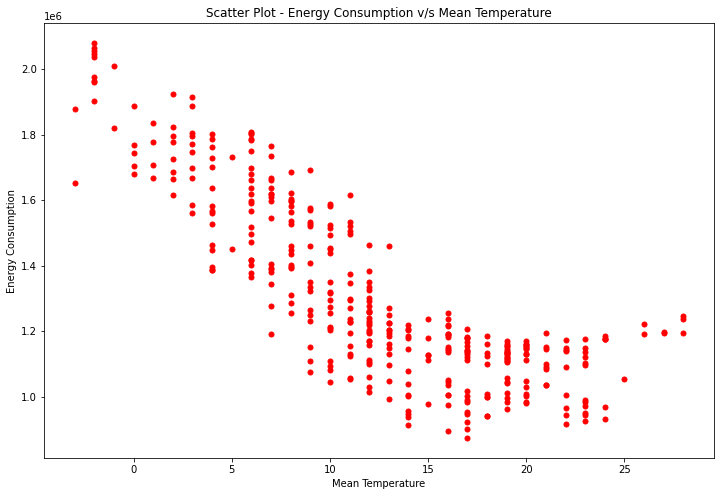

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(merged_df['avg Temp. (°C)'], merged_df['Energie journalière (MWh)'], s = 25,c= "red" )
plt.title("Scatter Plot - Energy Consumption v/s Mean Temperature")
plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')

plt.show()

# Here we have made a scatter plot with average temperature values on x axis and energy values in the y axis. 
# We have set the colour and the pointer size. We have also set the title and x,y labels for the plot

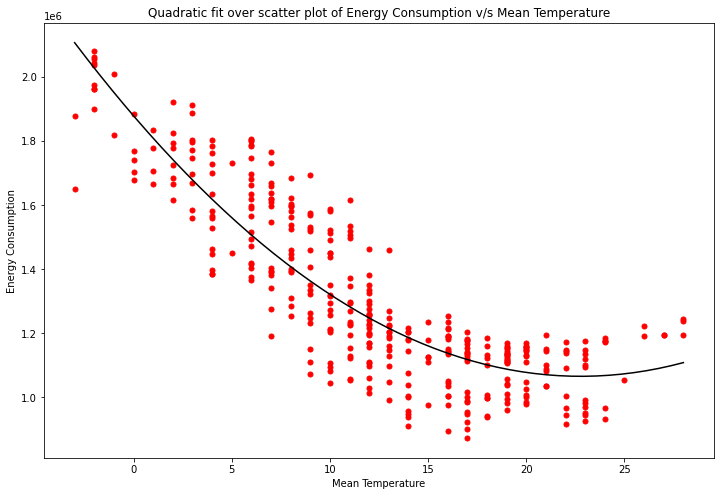

In [ ]:
aa = np.polyfit(merged_df['avg Temp. (°C)'], merged_df['Energie journalière (MWh)'], 2)
quad_model = np.poly1d(aa)

# here we have created a polynomial regression model to fit between the 'avg Temp. (°C)' and 'Energie journalière (MWh)' columns in our dataframe

x = np.linspace(min(merged_df['avg Temp. (°C)']), max(merged_df['avg Temp. (°C)']))
# here we have generated the evenly spaced array with minimum and maximum values of the average temperature

plt.figure(figsize=(12,8))
plt.plot(x, quad_model(x), c = "black")
 
# here we have plotted the regression model and have given the input to our regression model the array we created earlier and used the black color for plotting 

plt.scatter(merged_df['avg Temp. (°C)'], merged_df['Energie journalière (MWh)'], s = 25, c= "red" )
plt.title("Quadratic fit over scatter plot of Energy Consumption v/s Mean Temperature")
plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')

# here we have plotted the same scatter plot which we plot in the previous part. This is done to plot the regression model and scatter plot on the same figure

plt.show()

In [ ]:
quad_model = list(quad_model)
print(f"a = {quad_model[0]}, b = {quad_model[1]}, c = {quad_model[2]}")

# here we have converted the quadratic model into a list and then print the coefficients of the polynomial one by one

x_vertex = -quad_model[1]/(2*quad_model[0])
y_vertex = (quad_model[0]*(x_vertex**2)) + (quad_model[1]*x_vertex) + quad_model[2]

# -b/2a is the value of the x point of vertex in the quadratic polynomial, we have found out it here. After that we have passed the x value in the model to get the minimum y value

print("Optimal temperature: ", x_vertex)
print("Minimum Energy consumption: ", y_vertex)

a = 1567.4638778658348, b = -71406.89532583412, c = 1879113.5563244943
Optimal temperature:  22.777843985488676
Minimum Energy consumption:  1065865.995714509


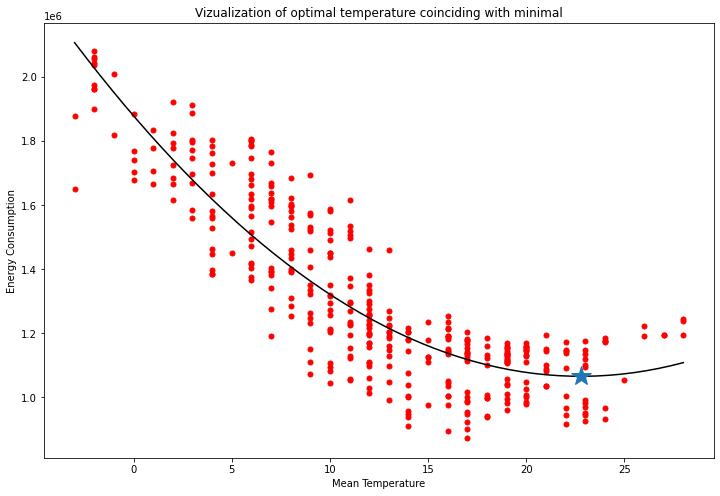

In [ ]:
aa = np.polyfit(merged_df['avg Temp. (°C)'], merged_df['Energie journalière (MWh)'], 2)
quad_model = np.poly1d(aa)
x = np.linspace(min(merged_df['avg Temp. (°C)']), max(merged_df['avg Temp. (°C)']))
plt.figure(figsize=(12,8))
plt.plot(x, quad_model(x), c = "black")

# this is the repeated code from the last question. 

plt.plot([22.78557753669432], [1065440.954052329], marker='*', ls = 'none', ms = 20)

# here we have plotted the optimal temperature and energy values which we have found out. We have done this to check our values visually   

plt.scatter(merged_df['avg Temp. (°C)'], merged_df['Energie journalière (MWh)'], s = 25,c= "red" )
plt.title("Vizualization of optimal temperature coinciding with minimal")
plt.xlabel('Mean Temperature')
plt.ylabel('Energy Consumption')

# this is the repeated code from the last question. 

plt.show()

In [ ]:
merged_df = merged_df.drop('Type de données', axis=1)

# here we have dropped another column from the enegy dataframe which had non numerical values, which are of no use to us

X = merged_df.drop(['Date', 'Energie journalière (MWh)'], axis=1)
y = merged_df['Energie journalière (MWh)']

# Again dropping the columns which have no use in our multivariate linear regression model. Here we have splitted the data into features and labels

In [ ]:
def feature_selection(X, y, threshold_in, verbose = False):
    included_features = []
    while True:
        changed = False
        excluded_features = list(set(X.columns)-set(included_features))
        new_pvalues = pd.Series(index = excluded_features, dtype='float64')
        for feature in excluded_features:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included_features+[feature]],columns = included_features+[feature]))).fit()
            new_pvalues[feature] = model.pvalues[feature]
        best_pvalue = new_pvalues.min()
        if best_pvalue < threshold_in:
            best_feature = new_pvalues.idxmin()
            included_features.append(best_feature)
            changed = True
            if verbose:
                print('Adding feature:  with p-value '.format(best_feature, best_pvalue))

        if not changed:
            break

    return included_features

# here we have implemented the forward regression using the stepwise approach to find our multivariate linear regression model
# the function takes arguments as features, labels and the threshold which we will use as 0.05 here. Features selected in our final list is based on this value
# Features are selected if their p value is less than 0.05. This means that these features in the regresion model have significant importance as their cofficent is not 0 in the model. 
# Here e have craeted an empty list 'inclued_features' into which we have added the features one by one based upon the comparison with p value
# Inside the loop we added all the features who have not yet been added into the selected_features list till now. 
# Using pandas series we have craeated an object 'new_pvalues' which has the p values of all the features of the list 'excluded_features'. Then we store the p value of the feature in new_pvalue list
# After that we find the minimum value in p_values and store it in best_pvalue. 
# If best_pvalue is less than the threshold value set by us then that feature is added in the included features list. We do this by finding the index of the feature with minimum value


In [ ]:
threshold_in = 0.05

# Here we have set the threshold value 

included_vars = feature_selection(X, y, threshold_in)

# Here we have called the feature_selection function

model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included_vars]))).fit()
# Here we have fit a multivariate linear regression model with the selected variables chooses from our custom function

print("R-squared: ", model.rsquared)

# Here we have printed the R-squared value

print("Selected Variables", included_vars)

# Here we have printed the selected variables

R-squared:  0.7506437341112866
Selected Variables ['high Temp.\xa0(°C)', 'high Visibility\xa0(km)', 'high Humidity\xa0(%)', 'avg Temp.\xa0(°C)', 'low Humidity\xa0(%)', 'avg Dew Point\xa0(°C)', 'low Sea Level Press.\xa0(hPa)']


In [ ]:
X_squared = X**2

# here we have created the dataframe with the squared values of all the features of original dataframe

X_squared.columns = [col+'_squared' for col in X_squared.columns]

# here we have set the column names of the dataframe X_squared

X_combined = pd.concat([X, X_squared], axis=1)

# Here we have horizontally combined the squared terms to the original dataframe and named the new dataframe as X_combined

threshold_in = 0.05

# Here we have set the threshold value

included_vars = feature_selection(X_combined, y, threshold_in)

# Here we have called the feature_selection function

model = sm.OLS(y, sm.add_constant(pd.DataFrame(X_combined[included_vars]))).fit()

# Here we have fit a multivariate linear regression model with the selected variables chooses from our custom function

print("R-squared: ", model.rsquared)

# Here we have printed the R-squared value

print("Selected Variables", included_vars)

# Here we have printed the selected variables

R-squared:  0.8068265031072407
Selected Variables ['high Temp.\xa0(°C)', 'high Temp.\xa0(°C)_squared', 'high Visibility\xa0(km)_squared', 'high Visibility\xa0(km)']


In [ ]:
merged_df['weekday'] = pd.DatetimeIndex(merged_df['Date']).weekday

# Here we add a new column "weekday", which contains the weekday i.e 0-6 of each date in the "Date" column

dummyweeks = pd.get_dummies(merged_df['weekday'], prefix='weekday')

# here we create columns for each day of the week  

merged_df_ = pd.concat([merged_df, dummyweeks], axis=1)

# here we add the dummy columns to our original merged dataframe

X_ = merged_df_.drop(['Date', 'Energie journalière (MWh)', 'weekday'], axis=1)

# Here we have dropped the columns which are not required in the features

X_ = X_.rename(columns={'weekday_0': 'Monday', 'weekday_1': 'Tuesday', 'weekday_2': 'Wednesday', 'weekday_3': 'Thursday', 'weekday_4': 'Friday', 'weekday_5': 'Saturday', 'weekday_6': 'Sunday'})

# Here we have remaned the week day columns with their actual names

X_squared = X**2
X_squared.columns = [col+'_squared' for col in X_squared.columns]
X_ = pd.concat([X_, X_squared], axis=1)

# this is the same as previous implementation of X_combined dataframe in the last question

y = merged_df_['Energie journalière (MWh)']

# Here we have set the labels from our data

threshold_in = 0.05

# Here we have set the threshold value

included_vars = feature_selection(X_, y, threshold_in)

# Here we have called the feature_selection function

model = sm.OLS(y, sm.add_constant(pd.DataFrame(X_[included_vars]))).fit()

# Here we have fit a multivariate linear regression model with the selected variables chooses from our custom function

print("R-squared: ", model.rsquared)

# Here we have printed the R-squared value

print("Selected Variables", included_vars)

# Here we have printed the selected variables

R-squared:  0.8945057843312311
Selected Variables ['high Temp.\xa0(°C)', 'high Temp.\xa0(°C)_squared', 'Sunday', 'Saturday', 'avg Temp.\xa0(°C)', 'low Humidity\xa0(%)', 'high Wind\xa0(km/h)_squared', 'Monday', 'sum Precip.\xa0(mm)', 'avg Temp.\xa0(°C)_squared', 'high Dew Point\xa0(°C)_squared']


Here with this approaach we can not be sure that the model is not overfitting. We can use a approach where we divide the data into training and validation data and test the model on validation data. If our model trains well on training data but performs relatively bad on the validation set then we can say that our model is overfit. 

There are other approaches to deal with overfitting, such as - 

##Approach 1 - Regularization: 

Here we add a penalty to our loss function which we have to optimize. 

This term helps the model not to place too much emphasis on any one feature. 

As we do this the model will be better at generalising on the data which is unseen such as a validation or a test data.

##Approach 2 - Ensemble approach:

Here we use multiple (more than one) models to get one prediction. 

This way we use the average error of all the loss functions of different models. And hence our model performs well on un seen data and helps prevent overfitting. 

By this we improve the generalization of our model to unseen and new data.But this method comes with a tradeoff for being computaionally expensive. 